In [ ]:
#Code for Cutting spaces around book

In [1]:
#Code for Horizontally cutting image
import cv2
import numpy as np
from scipy.signal import find_peaks

def kth_smallest_el(lst, k):
    lst.sort()
    return lst[k-1]

def kth_largest_el(lst, k):
    lst.sort()
    return lst[-k]

# read image+crop image
path=r'C:/Users/Keitaro Ninomiya/Box/Research Notes (keitaro2@illinois.edu)/Tokyo_Jobs/Raw_Data/Metropolitan_DA/1937/img/'
img = cv2.imread(path+"Page150.jpg")
crop_img=img[80:500, 380:860] #### Automate this part ####
hh, ww = crop_img.shape[:2]
# convert to grayscale
gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
# threshold gray image
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

# count number of non-zero pixels in each column and row. 
countCol = np.count_nonzero(thresh, axis=0)
countRow = np.count_nonzero(thresh, axis=1)

### This finds the height of the lowest valley
peaks, _ = find_peaks(-countCol, distance=13)
Thres=min(countCol[peaks])

### threshold count at Thres
count_thresh = countCol.copy()
count_thresh[countCol==Thres] = 255
count_thresh[countCol>Thres] = 0
count_thresh = count_thresh.astype(np.uint8)

### get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

### loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
result = crop_img.copy()
x,y,w,h = cv2.boundingRect(contours[0])
cv2.line(result, (y,0), (y,hh), (255, 0, 0), 1)

LeftImage=result[0:hh,0:y]
RighImage=result[0:hh,y:ww]
cv2.imshow("LeftImage", LeftImage)
cv2.imshow("RightImage", RighImage)
cv2.waitKey(0)


-1

In [2]:
#Code for Cutting image vertically for multi-row image
import cv2
import numpy as np
from scipy.signal import find_peaks

def kth_smallest_el(lst, k):
    lst.sort()
    return lst[k-1]

# read image+crop image
crop_img=RighImage
hh, ww = crop_img.shape[:2]
# convert to grayscale
gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
# threshold gray image
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

# count number of non-zero pixels in each column and row. 
countRow = np.count_nonzero(thresh, axis=1)

### This finds the height of 4th lowest valley: Choose the valley closest to the middle line.
peaks, _ = find_peaks(-countRow, distance=30)

### threshold count at Thres
count_thresh = countRow.copy()
count_thresh[peaks] = 255
count_thresh[count_thresh!=255] = 0
count_thresh = count_thresh.astype(np.uint8)

### get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

### loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
result = crop_img.copy()
for cntr in contours: #Possibly replace this by nearest contour
    x,y,w,h = cv2.boundingRect(cntr)
    ycenter = y
    if abs(ycenter-hh//2)<20:
        CenterLine = y+20
        cv2.line(result, (0,CenterLine), (ww,CenterLine), (255, 0, 0), 1)
    else:
        continue

TopImage=result[0:CenterLine,0:ww]
BtmImage=result[CenterLine:hh,0:ww]

# display results
cv2.imshow("TopImage", TopImage)
cv2.imshow("BtmImage", BtmImage)
cv2.waitKey(0)


-1

In [3]:
#Code for adjusting angle: Right page
import imutils
import matplotlib.pyplot as plt

def Rotate_Right(RighImage):    
    #### Bench Marking ####
    gray = cv2.cvtColor(RighImage,cv2.COLOR_BGR2GRAY)
    # threshold gray image
    thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
    ## count number of non-zero pixels in each column and row. 
    countCol = np.count_nonzero(thresh, axis=0)
    ## This finds the locations of valleys
    peaks, _ = find_peaks(countCol, distance=30)
    
    res = res = np.mean(np.diff(peaks))
    print("Initial average distance is"+str(res))

    #Rotate image
    for i in range(1,10):
        Rotimage = imutils.rotate(RighImage, angle=0.5*i)
        
        gray = cv2.cvtColor(Rotimage,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
        countCol = np.count_nonzero(thresh, axis=0)
        peaks, _ = find_peaks(countCol, distance=30)
        new_res = np.mean(np.diff(peaks))
        
        if res>new_res:
            print("Updating tilts, New distance is"+str(new_res))
            res=new_res
            continue
        else:
            print("Finished: Final distance is"+str(res)+". Next was"+str(new_res))
            return Rotimage
            break

img=Rotate_Right(TopImage)
cv2.imshow("image",img)
cv2.waitKey(0)

Initial average distance is46.5
Updating tilts, New distance is43.75
Updating tilts, New distance is39.2
Finished: Final distance is39.2. Next was44.25


-1

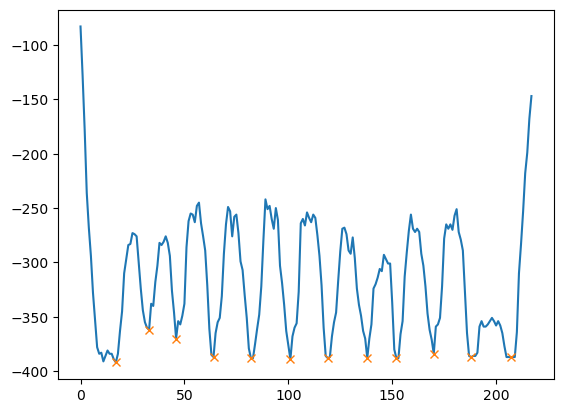

-381


In [ ]:
plt.plot(-countCol)
plt.plot(peaks, -countCol[peaks], "x")
plt.show()
print(Thres)

In [10]:
#Code for Adding Grid
#Identify grid location
## convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# threshold gray image
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

## count number of non-zero pixels in each column and row. 
countCol = np.count_nonzero(thresh, axis=0)
countRow = np.count_nonzero(thresh, axis=1)

## Column lines
### This finds the height of the smallest peak
peaks, _ = find_peaks(countCol, distance=15)
Thres=min(countCol[peaks])
### threshold count at Thres
count_thresh = countCol.copy()
count_thresh[peaks] = 255
count_thresh[count_thresh!=255] = 0
count_thresh = count_thresh.astype(np.uint8)

### get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

### loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
result = img.copy()
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    ycenter = y+h//2
    cv2.line(result, (ycenter,0), (ycenter,hh), (255, 0, 0), 1)

### Row lines ###
peaks, _ = find_peaks(-countRow, distance=50)
Thres=min(countRow[peaks])
### threshold count at Thres
count_thresh = countRow.copy()
count_thresh[countRow==Thres] = 255
count_thresh[countRow<Thres] = 0
count_thresh = count_thresh.astype(np.uint8)

### get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

### loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    ycenter = y+h//2
    cv2.line(result, (0,ycenter), (ww,ycenter), (255, 0, 0), 1)

# display results
cv2.imshow("RESULT", result)
cv2.waitKey(0)

cv2.imwrite(r'C:/Users/Keitaro Ninomiya/Desktop/TopImage_example.png', result)

True

In [ ]:
#Code for Adding Grid
#Identify grid location
## convert to grayscale
gray = cv2.cvtColor(BtmImage,cv2.COLOR_BGR2GRAY)
# threshold gray image
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

## count number of non-zero pixels in each column and row. 
countCol = np.count_nonzero(thresh, axis=0)
countRow = np.count_nonzero(thresh, axis=1)

### Column lines ###
### This finds the height of the smallest peak
peaks, _ = find_peaks(countCol, distance=13)
Thres=min(countCol[peaks])
### threshold count at Thres
count_thresh = countCol.copy()
count_thresh[countCol<Thres] = 255
count_thresh[countCol<Thres] = 0
count_thresh = count_thresh.astype(np.uint8)

### get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

### loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
result = BtmImage.copy()
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    ycenter = y+h//2
    cv2.line(result, (ycenter,0), (ycenter,hh), (255, 0, 0), 1)

### Row lines ###
peaks, _ = find_peaks(-countRow, distance=50)
Thres=min(countRow[peaks])
### threshold count at Thres
count_thresh = countRow.copy()
count_thresh[countRow==Thres] = 255
count_thresh[countRow<Thres] = 0
count_thresh = count_thresh.astype(np.uint8)

### get contours
contours = cv2.findContours(count_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

### loop over contours and get bounding boxes and ycenter and draw horizontal line at ycenter
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    ycenter = y+h//2
    cv2.line(result, (0,ycenter-20), (ww,ycenter-20), (255, 0, 0), 1)

# display results
cv2.imshow("THRESHOLD", thresh)
cv2.imshow("RESULT", result)
cv2.waitKey(0)

cv2.imwrite(r'C:/Users/Keitaro Ninomiya/Desktop/BtmImage_example.png', result)

True

In [34]:
class Crop:
    def __init__(self,im):
        self.im=im

    def Crop(self):
        width,height=self.im.size
        left=0
        top=0
        right=width
        bottom=4*height/5
        im=self.im.crop((left,top,right,bottom))
        return im


-1